<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [25]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [26]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
    - RM
    - MEDV
2.   Равномерное
3.   Биноминальное
    - RAD
    - TAX
4.   Бернулли
    - CHAS
5.   Геометрическое
    - CRIM
    - ZN
6.   Логнормальное
    - DIS
    - LSTAT 
    - NOX (parts=20)
    - Возможно, RM

Для Примеров ниже, определить распределение по графику сложно
- Возможно, смещенное распределение Стюднта: AGE, B
- Возможно, биномиальное распределение: PTRATIO, INDUS


CRIM


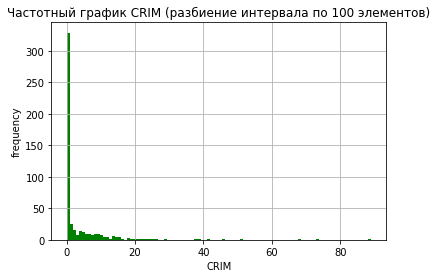

ZN


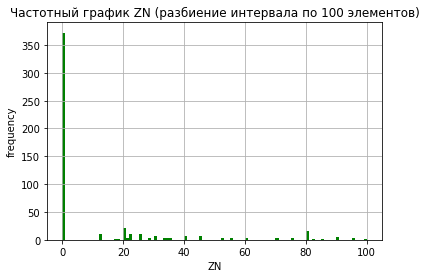

INDUS


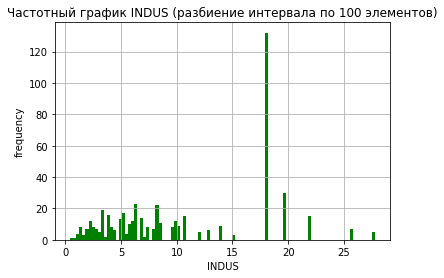

CHAS


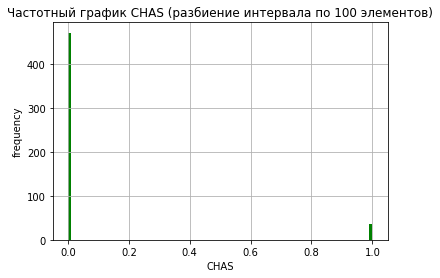

NOX


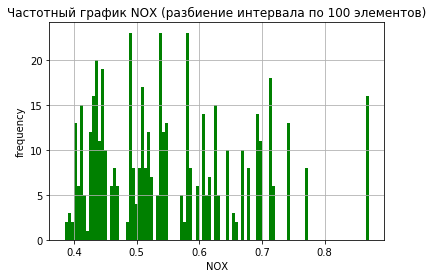

RM


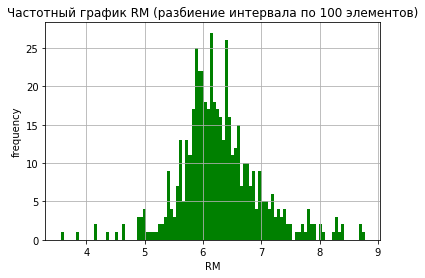

AGE


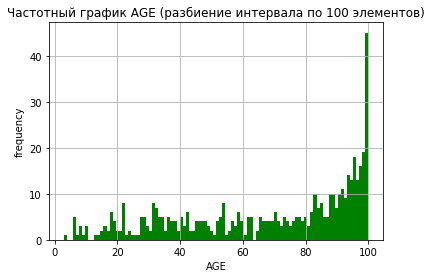

DIS


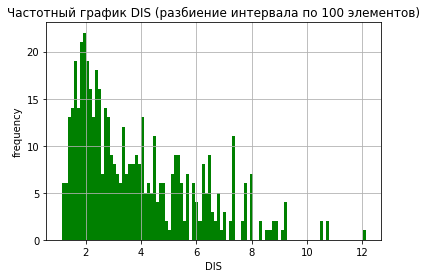

RAD


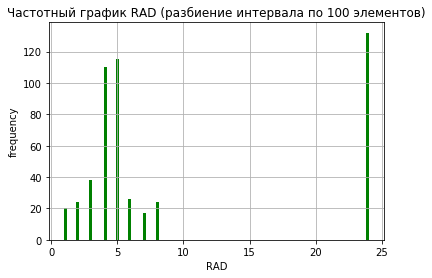

TAX


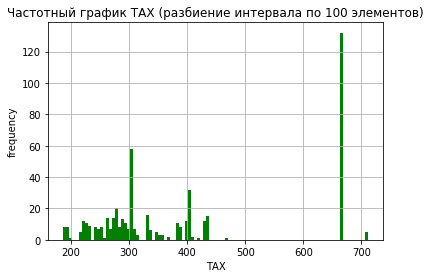

PTRATIO


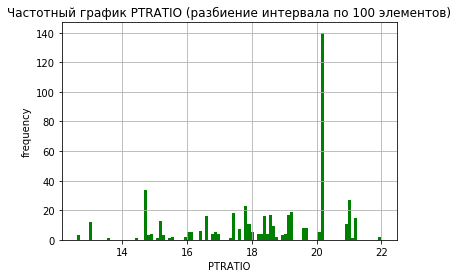

B


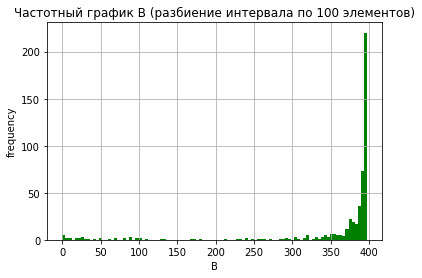

LSTAT


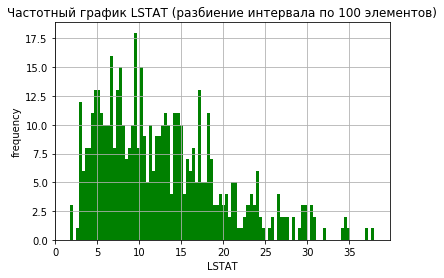

MEDV


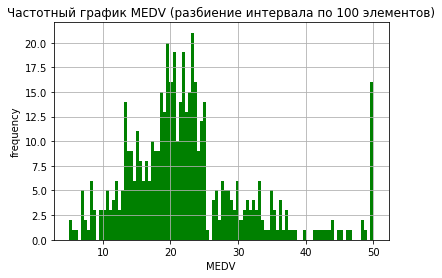

In [27]:
# sns.pairplot(data)

#данный метод рисует быстрее
parts = 100
for column in data:
    print(column)
    plt.hist(data[column], parts, facecolor='g')
    plt.ylabel('frequency')
    plt.xlabel(column)
    plt.title(f'Частотный график {column} (разбиение интервала по {parts} элементов)')
    plt.grid(True)
    plt.show()

Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

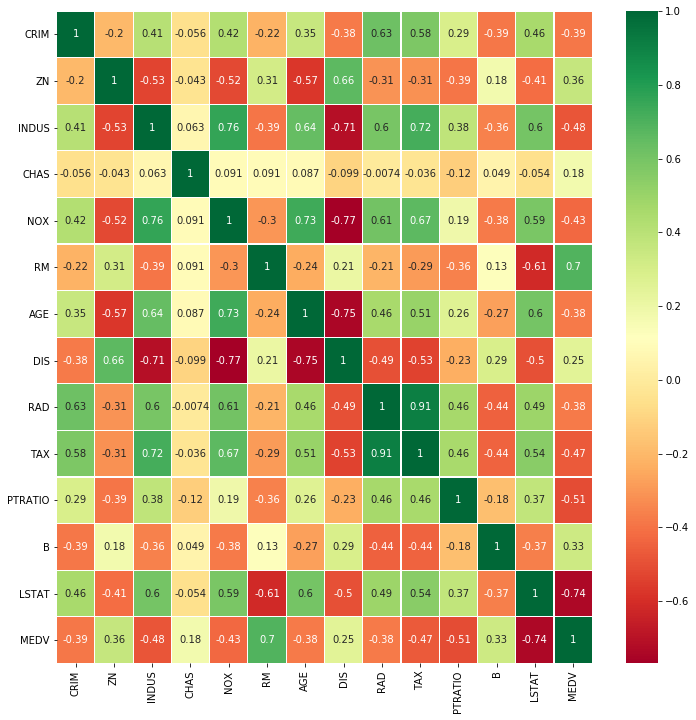

In [28]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [29]:
y = np.array(data['MEDV']).reshape(-1,1)
X = np.array(data['LSTAT']).reshape(-1,1)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2
)

# 2. создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# 3. расчет ошибки модели
score = model.score(X_test, y_test)
print(f"Точность модели (на тестовых данных): {score*100:.2f}%")

#
# y_pred = model.predict(X_test)

Точность модели (на тестовых данных): 52.59%


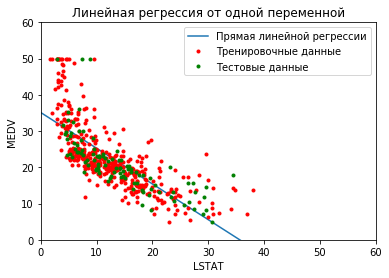

In [31]:
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(0, 40, 40)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'g.')
plt.xlim(0,60)
plt.ylim(0,60)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [32]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [33]:
print(f"В таблице отсутствуют {data.isnull().sum().sum()} значений")
if data['Country (region)'].isnull().sum() > 0:
    print(f"В столбце 'Country (region)' отсутсвует {data['Country (region)'].isnull().sum()} значений")
    data.drop(data[data['Country (region)'].isnull()].index)
data.fillna(0,inplace=True)

В таблице отсутствуют 23 значений


Сколько стран в выборке? Написать ответ. 

In [34]:
unique = data['Country (region)'].nunique()
total = data['Country (region)'].count()
print(f"В столбце 'Country (region)' {unique} уникальных записей из {total}")

В столбце 'Country (region)' 156 уникальных записей из 156


Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

**Выводы:** 
- В матрице корелляций отсутствуют отрицательные значения, т.о. сложно говорить о том, что увеличение какого-либо показателя будет сопрвождаться снижением какого-либо другого показателя (в первую очередь, речь идет о Ladder) 
- Можно предположить, что значение Ladder больше всего связано с показателями Social support, Healthy life expectancy и Log of GDP per capita
- Показатели Social support, Healthy life expectancy и Log of GDP per capita связаны/зависимы между собой
- Вызывает интерес коррелляция между Corruption и Freedom на уровне 0.41

Для более качественных выводов, необходимо понимание значений и методики их расчется, сбора.

In [35]:
# sns.heatmap(data.cov(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# # gcf() - получение текущей фигуры
# fig=plt.gcf()
# # set_size_inches() - установить размер фигуры
# fig.set_size_inches(12,12)
data.cov().style.background_gradient(cmap='coolwarm').set_precision(2)

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,2041.00,1100.84,1014.41,1079.27,1671.65,1125.85,438.73,1027.35,1555.55,1558.22
SD of Ladder,1100.84,2041.00,168.80,1247.90,1207.88,505.28,481.70,788.86,1237.45,1183.18
Positive affect,1014.41,168.80,2041.00,819.17,812.31,1403.90,447.82,749.46,601.24,622.31
Negative affect,1079.27,1247.90,819.17,2041.00,1284.02,900.34,345.18,716.13,1077.88,987.86
Social support,1671.65,1207.88,812.31,1284.02,2041.00,937.70,292.85,924.75,1439.99,1416.92
Freedom,1125.85,505.28,1403.90,900.34,937.70,2041.00,830.45,1019.96,795.21,763.04
Corruption,438.73,481.70,447.82,345.18,292.85,830.45,2014.59,568.57,581.92,293.50
Generosity,1027.35,788.86,749.46,716.13,924.75,1019.96,568.57,2041.00,979.26,827.15
Log of GDP per capita,1555.55,1237.45,601.24,1077.88,1439.99,795.21,581.92,979.26,2035.14,1540.28
Healthy life expectancy,1558.22,1183.18,622.31,987.86,1416.92,763.04,293.50,827.15,1540.28,2026.60


In [36]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1.00,0.54,0.50,0.53,0.82,0.55,0.22,0.50,0.76,0.77
SD of Ladder,0.54,1.00,0.08,0.61,0.59,0.25,0.24,0.39,0.61,0.58
Positive affect,0.50,0.08,1.00,0.40,0.40,0.69,0.22,0.37,0.30,0.31
Negative affect,0.53,0.61,0.40,1.00,0.63,0.44,0.17,0.35,0.53,0.49
Social support,0.82,0.59,0.40,0.63,1.00,0.46,0.14,0.45,0.71,0.70
Freedom,0.55,0.25,0.69,0.44,0.46,1.00,0.41,0.50,0.39,0.38
Corruption,0.22,0.24,0.22,0.17,0.14,0.41,1.00,0.28,0.29,0.15
Generosity,0.50,0.39,0.37,0.35,0.45,0.50,0.28,1.00,0.48,0.41
Log of GDP per capita,0.76,0.61,0.30,0.53,0.71,0.39,0.29,0.48,1.00,0.76
Healthy life expectancy,0.77,0.58,0.31,0.49,0.70,0.38,0.15,0.41,0.76,1.00


# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

**Равномерное распределение**

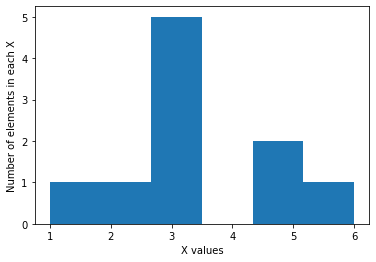

[3 3 5 6 2 1 5 3 3 3]


In [37]:
low=1
high=6
sample_size=10
res = np.random.randint(low,high+1,sample_size)
plt.hist(res, high)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()
print(res)

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

**Вывод**: Первичная выборка является несмещенной. Поэтому распределение средних по выборке n=100, описывается нормальным распределением

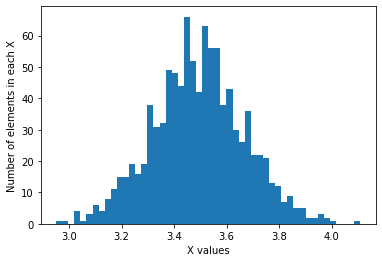

In [38]:
number_of_sums = 1000
sample_size=100
X1 = np.zeros([number_of_sums])
for i in range(number_of_sums):
    X1[i] = np.sum(np.random.randint(low,high+1,sample_size))/sample_size

plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()